In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [3]:
data=pd.read_csv("/content/Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,0.0,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.shape

(150, 6)

In [8]:
data["Species"].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
fornum = preprocessing.LabelEncoder()
data['Species']= fornum.fit_transform(data['Species'])
data['Species'].unique()

array([0, 1, 2])

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

<Axes: >

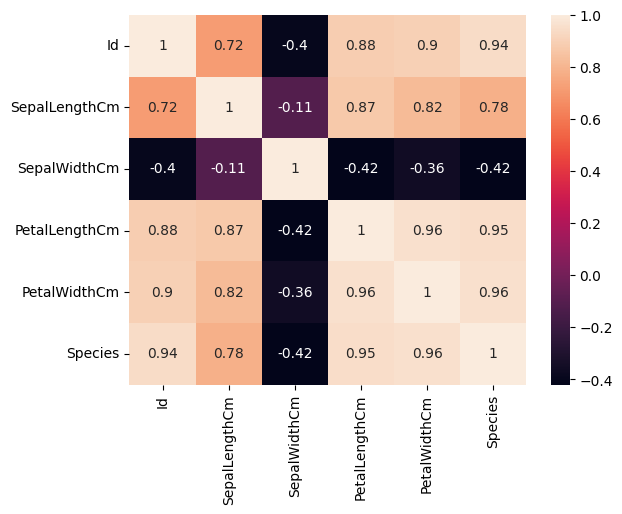

In [12]:
sns.heatmap(data.corr(),annot=True)

In [13]:
data.drop(["Id"],axis=1,inplace=True)

In [14]:
data.head(15)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,0.0,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


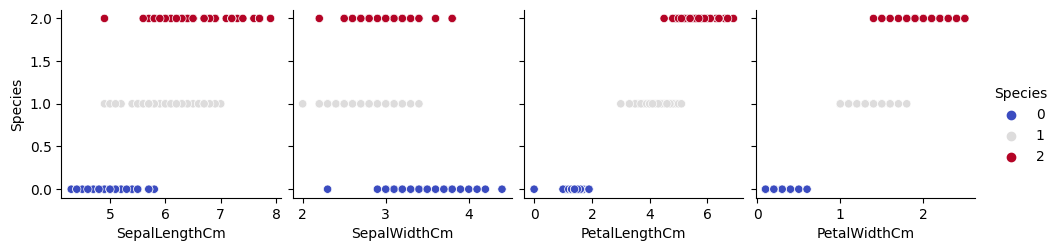

In [15]:
sns.pairplot(
    data,
    x_vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],
    y_vars=["Species"],hue='Species',
    palette='coolwarm'
)

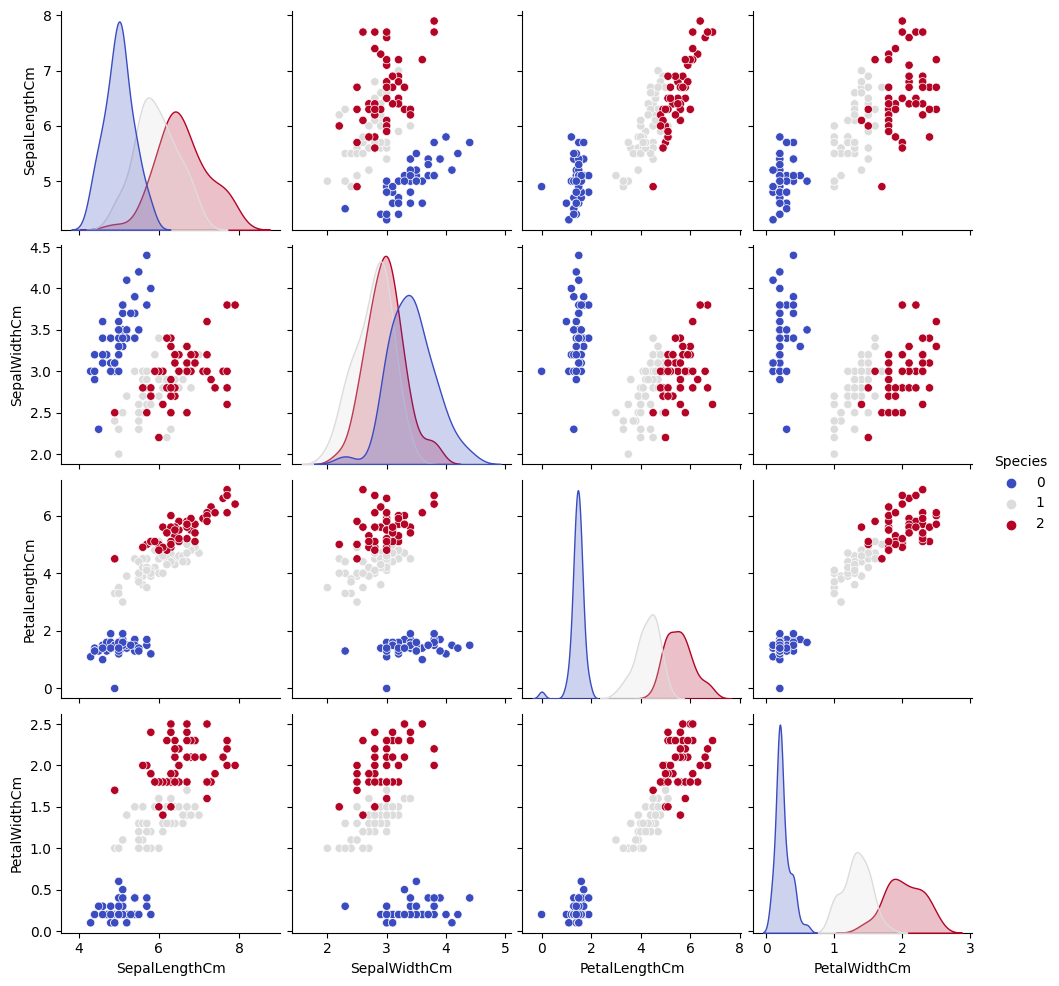

In [16]:
sns.pairplot(data,hue='Species',palette='coolwarm')

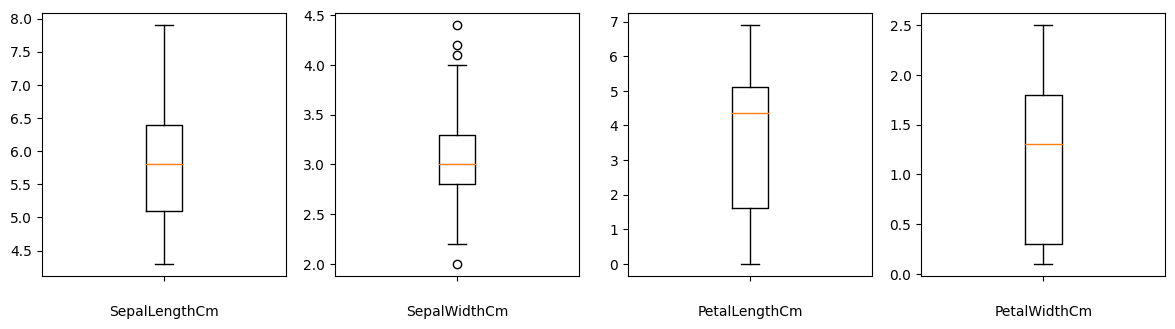

In [17]:
plt.rcParams["figure.figsize"] = [14.50, 7.50]
plt.subplot(241)
plt.boxplot(data['SepalLengthCm'],labels=' ');
plt.xlabel('SepalLengthCm')
plt.subplot(242)
plt.boxplot(data['SepalWidthCm'],labels=' ');
plt.xlabel('SepalWidthCm')
plt.subplot(243)
plt.boxplot(data['PetalLengthCm'],labels=' ');
plt.xlabel('PetalLengthCm')
plt.subplot(244)
plt.boxplot(data['PetalWidthCm'],labels=' ');
plt.xlabel('PetalWidthCm');


In [18]:
#Let's try get ride of outliers!
for x in ['SepalWidthCm']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
  
    data.loc[data[x] > max,x] = max
    data.loc[data[x] < min,x] = min


<Axes: >

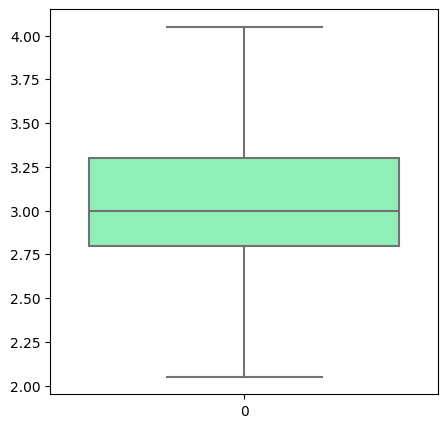

In [19]:
plt.subplots(figsize=(5,5))
sns.boxplot(data=data["SepalWidthCm"],palette='rainbow')

<ipython-input-20-bf36bd030865>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["SepalLengthCm"])


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

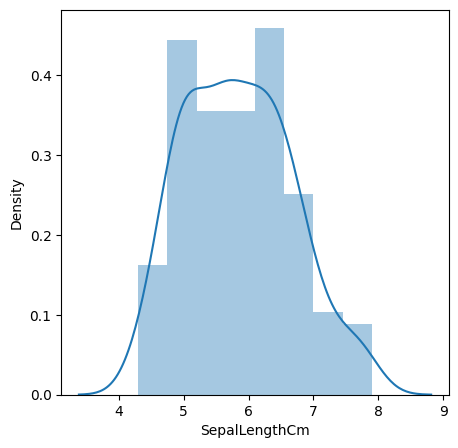

In [20]:
plt.subplots(figsize=(5,5))
sns.distplot(data["SepalLengthCm"])


<ipython-input-21-3602cd0ee56a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["SepalWidthCm"])


<Axes: xlabel='SepalWidthCm', ylabel='Density'>

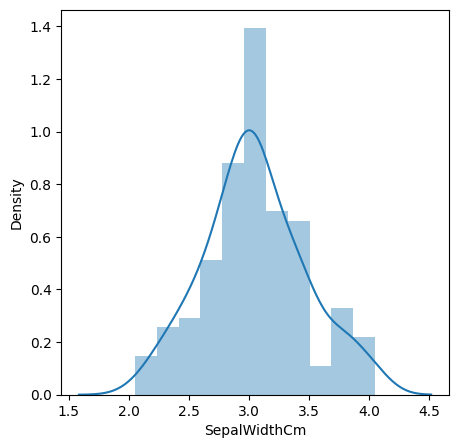

In [21]:
plt.subplots(figsize=(5,5))
sns.distplot(data["SepalWidthCm"])

<ipython-input-22-477c7a655d99>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["PetalLengthCm"])


<Axes: xlabel='PetalLengthCm', ylabel='Density'>

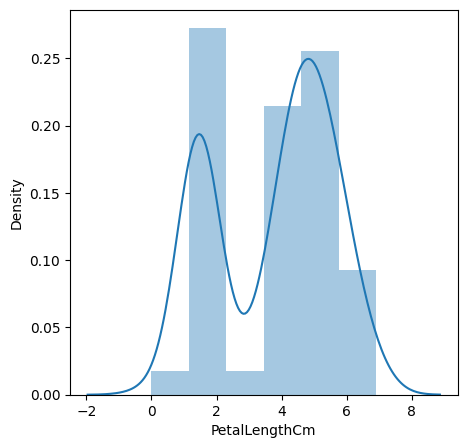

In [22]:
plt.subplots(figsize=(5,5))
sns.distplot(data["PetalLengthCm"])

<ipython-input-23-58ad931b465a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["PetalWidthCm"])


<Axes: xlabel='PetalWidthCm', ylabel='Density'>

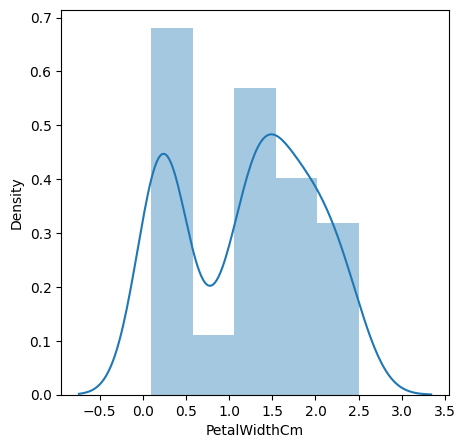

In [23]:
plt.subplots(figsize=(5,5))
sns.distplot(data["PetalWidthCm"])

In [24]:
X=data.drop(['Species'],axis=1)
Y=data['Species']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=42)
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
67,5.8,2.7,4.1,1.0
28,5.2,3.4,1.4,0.2
40,5.0,3.5,1.3,0.3
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [26]:
y_train

0      0
122    2
67     1
28     0
40     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: Species, Length: 97, dtype: int64

In [27]:
#decision tree
model_tree=tree.DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
prediction_decision_tree=model_tree.predict(X_test)
accuracy_tree=accuracy_score(y_test,prediction_decision_tree)

accuracy_tree

1.0

In [28]:
report = classification_report (y_test, prediction_decision_tree)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [42]:
!pip install pydotplus
!apt-get install graphviz -y
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Package 'libfluidsynth1' has no installation candidate
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 104.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━

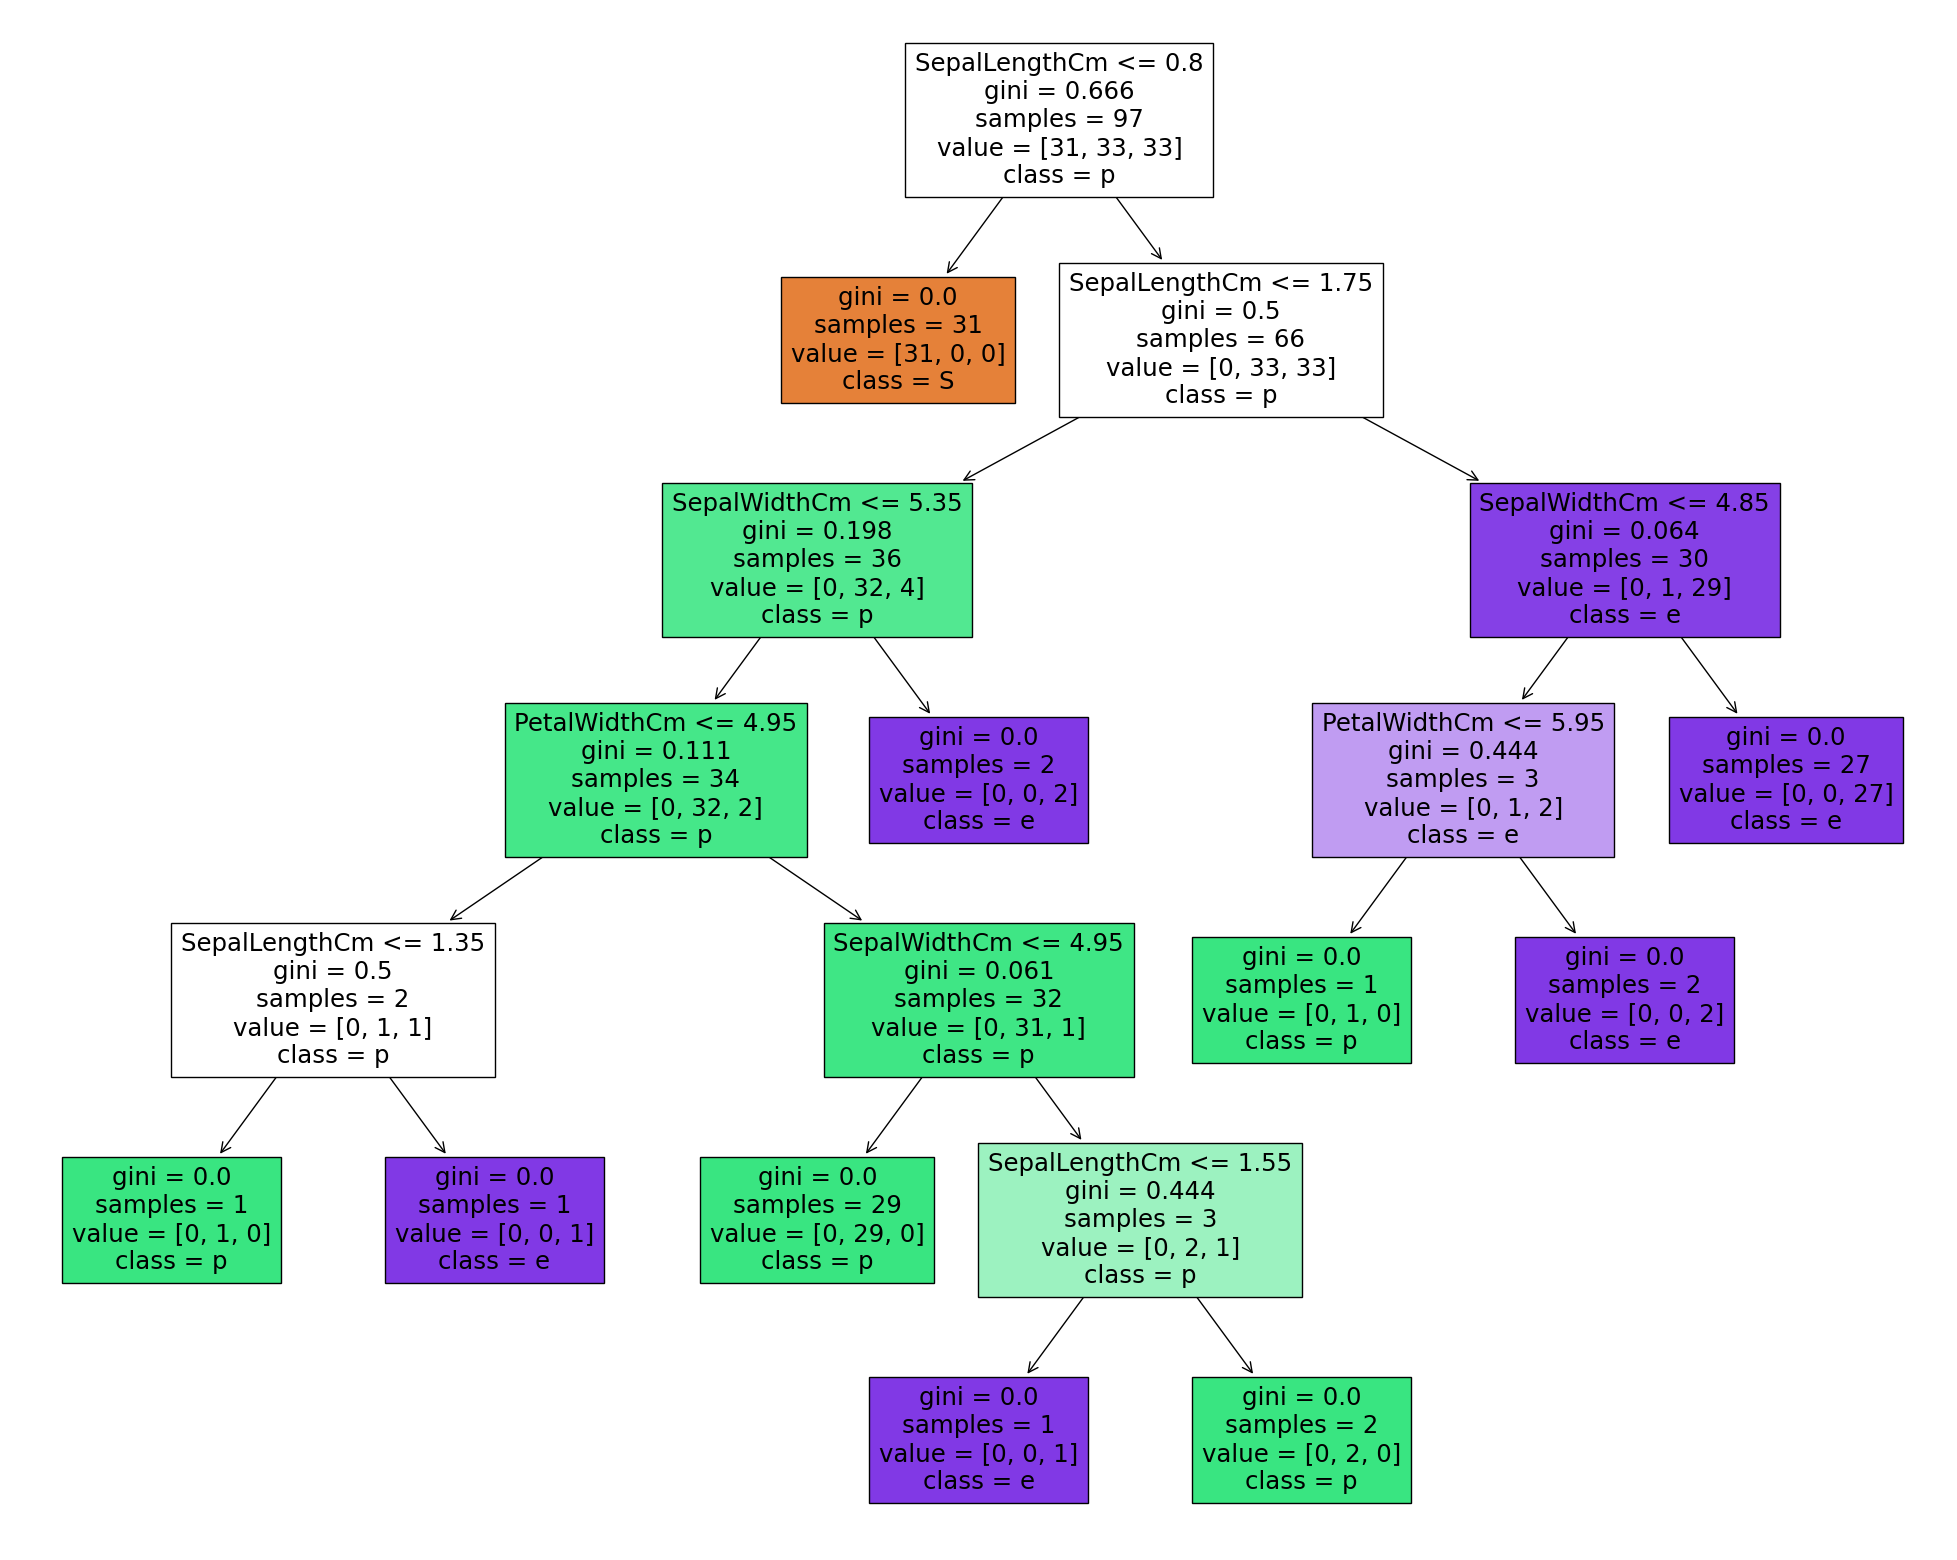

In [44]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_tree,
                   feature_names = ["PetalWidthCm", "PetalLengthCm", "SepalWidthCm","SepalLengthCm"],
                   class_names = "Species",
                   filled=True)
     